# Logistic Regression and Support Vector Machine classifier

### 1. Logistic Regression 
The __logistic function__ (which is more commonly called __sigmoid function__) basically maps an input to an output of values between 0 and 1. And it is defined as follows:
$$y(z) = \frac{1}{1+ exp(-z)}$$

We can visualize it as follows:


First define the logistic function:

In [1]:
import numpy as np
def sigmoid(input):
    return 1.0 / (1 + np.exp(-input))

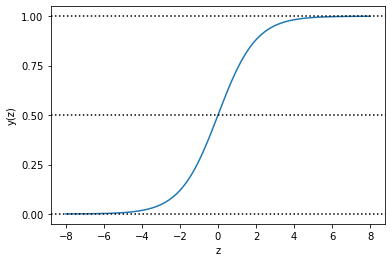

In [2]:
# Input variables from -8 to 8, and the output correspondingly:
z = np.linspace(-8, 8, 1000)
y = sigmoid(z)
import matplotlib.pyplot as plt
plt.plot(z, y)
plt.axhline(y=0, ls='dotted', color='k')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.axhline(y=1, ls='dotted', color='k')
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.xlabel('z')
plt.ylabel('y(z)')
plt.show()

In the S-shaped curve, all inputs are transformed into the range from 0 to 1. For positive inputs, a greater value results in an output closer to 1; for negative inputs, a smaller value generates an output closer to 0; when the input is 0, the
output is the midpoint 0.5.

Logistic regression, by default, is limited to two-class classification problems. It cannot be used for classification tasks that have more than two class labels, so-called multi-class classification. Instead, it requires modification to support multi-class classification problems.

__The multinomial logistic regression__ (often just called 'multinomial regression') algorithm is an extension to the logistic regression model that involves changing the loss function to cross-entropy loss and predict probability distribution to a multinomial probability distribution to natively support multi-class classification problems.

### 2. Support Vector Machine

Support Vector Machines (or SVM) seek a line that best separates two classes. Those data instances that are closest to the line that best separates the classes are called support vectors and influence where the line is placed. SVM has been extended to support multiple classes.Of particular importance is the use of different kernel functions via the kernel parameter.

Kernels can be used that transform the input space into higher dimensions such as a Polynomial Kernel and a Radial Kernel. This is called the Kernel Trick. It is desirable to use more complex kernels as it allows lines to separate the classes that are curved or even more complex. This in turn can lead to more accurate classifiers.

### Assignment

In this assignment, you are given a dataset comprising information about dinosaurs. You will use logistic regression and support vector machine models to predict the type of dinosaur based on the provided information. In this assignment, you may utilize built-in libraries. Employ _stratified k-fold cross-validation_ (CV) with 10 folds for evaluating the classification models. Stratification ensures that each CV fold maintains a similar distribution of class examples as the entire training set. You can design various experiments by selecting some/all information provided in the dataset. Here, we expect the best result you obtained after these experiments and observations. Please explicitly mention your feature selection method in your report while presenting results. 


Stratified k-fold cross-validation is a technique used to evaluate the performance of machine learning models, particularly in classification tasks, where the target class distribution may be imbalanced. In this method, the dataset is divided into 'k' equally sized folds, ensuring that each fold maintains a similar distribution of class examples as the entire dataset. This stratification process helps to reduce the bias and variance in model performance estimation by preventing a skewed distribution of classes in the train and test sets.

During the cross-validation process, the model is trained on 'k-1' folds and tested on the remaining fold, iterating this process 'k' times. Each iteration uses a different fold for testing, and the average performance metric (e.g., accuracy) is calculated over all iterations.

Here's a code example using the scikit-learn library:


In [3]:
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Initialize stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5)  # Set the number of folds to 5

# Initialize the logistic regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Perform stratified k-fold cross-validation
accuracy_scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
   
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    accuracy_scores.append(accuracy)

# Calculate the mean accuracy
mean_accuracy = np.mean(accuracy_scores)
print("Mean accuracy:", mean_accuracy)

Mean accuracy: 0.9733333333333334


In this example, we use the Iris dataset and a logistic regression model to demonstrate stratified k-fold cross-validation with 5 folds. The performance of the model is evaluated using accuracy as the performance metric, and the mean accuracy is reported.

Stratified cross-validation is particularly useful when dealing with imbalanced datasets, where some classes have significantly fewer examples compared to others. In such cases, using standard cross-validation might lead to situations where one or more folds contain very few or even none of the underrepresented class instances. This could result in an inaccurate and biased performance estimation of the model, as the model is not adequately tested on all classes.

For balanced datasets, where class distributions are roughly equal, stratified cross-validation may not provide significant benefits over standard cross-validation. However, it is still a good practice to use stratified cross-validation as a default approach, as it generally leads to more stable and reliable performance estimates.

__Evaluation Metrics__: Provide _mean weighted F1 scores_ and a confusion matrix to evaluate and compare the performance of the classification models.

Here is an example code how to compute mean weighted F1 score in k-fold cross-validation setting:

In [ ]:
f1_scores = []

# Perform k-fold stratified cross-validation
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
   
    # Necessary code to compute the predictions using your classifier..
    #...
    # y_pred = ...
    
    # Compute the weighted-average F1-score for this fold
    fold_f1_score = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(fold_f1_score)

# Calculate the mean F1-score across all folds
mean_weighted_f1_score = np.mean(f1_scores)
print("Mean weighted-average F1-score across", k, "folds:", mean_weighted_f1_score)

### Submissions


After training your models with the data in _train.csv_, use the given _test.csv_ data for your predictions (predicted 'type' values); save it as csv file, and upload it to the Kaggle competition. Furthermore, you are supposed to upload your coding in Jupyter notebook to the department's submission system.

Kaggle competition for logistic regression: https://www.kaggle.com/t/1aad2bcbe8c14b80918ec67ef7041c9b

Kaggle competition for support vector machine: https://www.kaggle.com/t/f4f6aee930674ea3a86aada32d861cfa

**Due Date**: 30.04.2023

**Note**: The late submission rules previously announced from the piazza apply.

### Your Work

In [ ]:
#Include your codes below by including as many cells as necessary to clearly demonstrate your work
#Please write your codes in separate sections for data pre-processing, Logistic Regression and SVM models etc.

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#load datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data = train_data.dropna(axis=0)

In [ ]:
#pre-processing
train_to_x_train=['name', 'diet', 'period','lived_in', 'length','species',"named_by","taxonomy"]
dummies_to_x_train =['name', 'diet', 'period', 'lived_in', 'species',"named_by","taxonomy"]

# Select features and target variable
X_train = train_data[train_to_x_train]
y_train = train_data['type']

preXtrain = X_train["length"].str.replace("m", "").astype(float)
X_train["length"] = preXtrain


# Compute the average of non-blank values in the length column
length_avg = X_train.loc[X_train["length"].notna(), "length"].mean()
X_train["length"] = X_train["length"].fillna(length_avg)
X_train["period"] = X_train["period"].str.split(" ").str.slice(stop=2).str.join("")
X_train["named_by"] = X_train["named_by"].str.split(" ").str.get(0)

X_train = pd.get_dummies(X_train, columns=dummies_to_x_train)
X_train_before_scale = X_train


# Select features for test data and transform them
X_test = test_data[train_to_x_train]
X_test["length"] = X_test["length"].str.replace("m", "").astype(float)
# Compute the average of non-blank values in the length column
length_avg = X_test.loc[X_test["length"].notna(), "length"].mean()
X_test["length"] = X_test["length"].fillna(length_avg)
X_test["period"] = X_test["period"].str.split(" ").str.slice(stop=2).str.join("")
X_test["named_by"] = X_test["named_by"].str.split(" ").str.get(0)

X_test = pd.get_dummies(X_test, columns=dummies_to_x_train)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
# Scale the data
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns) 

In [ ]:
# Initialize stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize logistic regression and SVM models
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
svm_model = SVC(kernel='linear')

In [ ]:
# Fit the logistic regression and SVM models on the entire training data
lr_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predict the target variable for the test data using the logistic regression and SVM models
lr_y_pred = lr_model.predict(X_test)
svm_y_pred = svm_model.predict(X_test)

In [ ]:
# Initialize lists for storing evaluation metrics
lr_f1_scores = []
svm_f1_scores = []
lr_cm_list = []
svm_cm_list = []

In [ ]:
# Reassign y_train as a Pandas Series

y_train = train_data['type']

# Iterate through each fold of the cross-validation
for train_idx, test_idx in skf.split(X_train_before_scale, y_train):
    X_train_fold, X_test_fold = X_train_before_scale.iloc[train_idx], X_train_before_scale.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Fit the logistic regression model and evaluate performance
    lr_model.fit(X_train_fold, y_train_fold)
    lr_y_pred = lr_model.predict(X_test_fold)
    lr_f1 = f1_score(y_test_fold, lr_y_pred, average='weighted')
    lr_cm = confusion_matrix(y_test_fold, lr_y_pred)
    lr_f1_scores.append(lr_f1)
    lr_cm_list.append(lr_cm)

    # Fit the SVM model and evaluate performance
    svm_model.fit(X_train_fold, y_train_fold)
    svm_y_pred = svm_model.predict(X_test_fold)
    svm_f1 = f1_score(y_test_fold, svm_y_pred, average='weighted')
    svm_cm = confusion_matrix(y_test_fold, svm_y_pred)
    svm_f1_scores.append(svm_f1)
    svm_cm_list.append(svm_cm)

# Calculate and print the mean F1 scores for each model
print("Logistic Regression Mean F1 Score: ", np.mean(lr_f1_scores))
print("SVM Mean F1 Score: ", np.mean(svm_f1_scores))

In [13]:
#sum all the matrices
concMartixLr=""
concMartixSvm=""
for i in range(len(lr_cm_list)):
    if i == 0:
        concMartixLr = lr_cm_list[i]
        concMartixSvm = svm_cm_list[i]
    concMartixLr = concMartixLr+lr_cm_list[i]
    concMartixSvm = concMartixSvm+svm_cm_list[i]

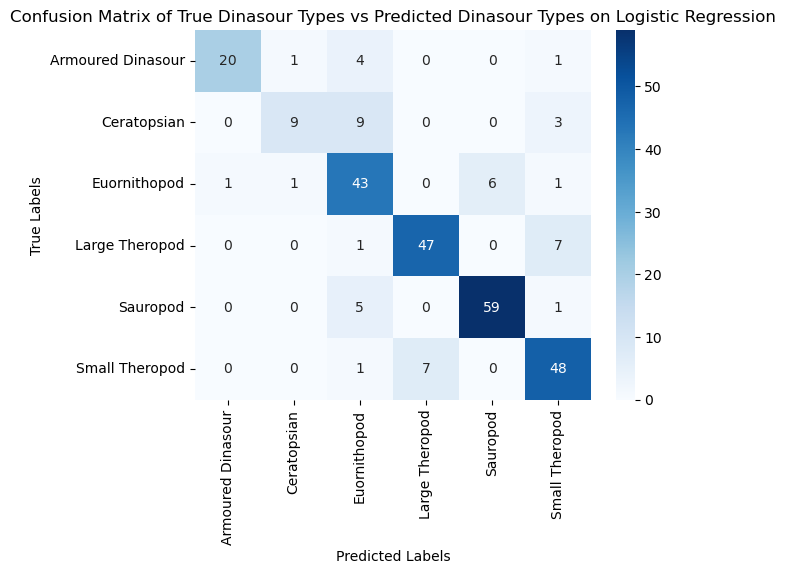

In [14]:
#Logistic Regression Confusion Matrix Plot
# define the labels for the classes
labels = ["Armoured Dinasour", "Ceratopsian", "Euornithopod", "Large Theropod", "Sauropod", "Small Theropod"]

# create a heatmap using seaborn library
sns.heatmap(concMartixLr, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# set the plot title and axis labels
plt.title("Confusion Matrix of True Dinasour Types vs Predicted Dinasour Types on Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# show the plot
plt.show()


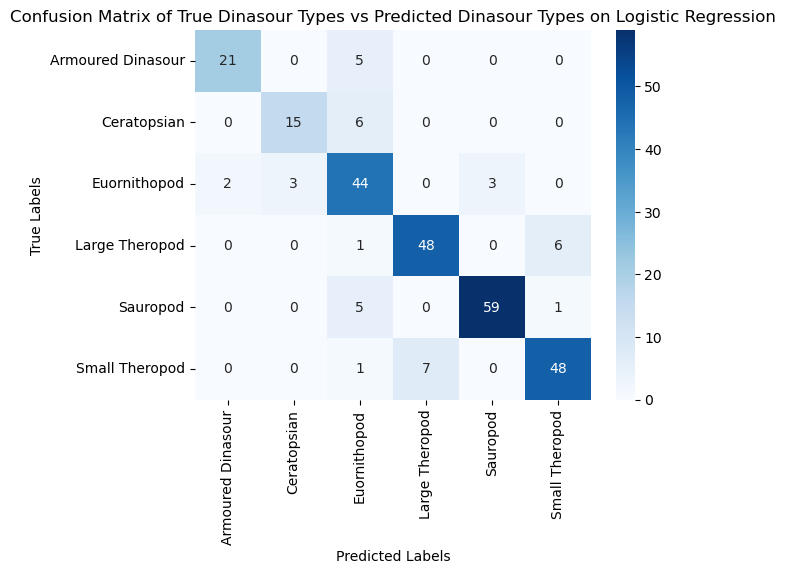

In [15]:
#Support Vector Machine Confusion Matrix Plot
# define the labels for the classes
labels = ["Armoured Dinasour", "Ceratopsian", "Euornithopod", "Large Theropod", "Sauropod", "Small Theropod"]

# create a heatmap using seaborn library
sns.heatmap(concMartixSvm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# set the plot title and axis labels
plt.title("Confusion Matrix of True Dinasour Types vs Predicted Dinasour Types on Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# show the plot
plt.show()